# Predictive Modeling and Analysis


### Hypothesis:
#### The tweets related to COVID are largely positive by talking about how to fight together and overcome the challenged in the pandemic time. This will be the hypothesis tested in this project.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from pathlib import Path
from wordcloud import WordCloud, STOPWORDS
from collections import Counter 
import re
import string
import math
import ast
import seaborn as sns

#### Loading the data onto a dataframe



In [2]:
tweetpath = Path('covid19_tweets.csv')

tweets = pd.read_csv(tweetpath)

print(tweets.shape)

tweets.sample(5)

(179108, 13)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
110524,Matthew Arnold,"Johannesburg, South Africa",Chief Connections Officer @VMLYR_ZA \nGamer 🎮 ...,2008-07-24 09:34:55,1046,671,2092,False,2020-08-12 09:32:49,Can't believe how few people know this: When i...,NaN,Twitter Web App,False
148838,RamaG Health and Wellness,South Africa,🌿Glowing Skin starts with a Healthy Gut 🌿 SKI...,2018-12-01 21:59:36,1139,2257,34,False,2020-08-18 18:02:23,As cool as a C.....\n\n#schoolsreopening #Tues...,"['schoolsreopening', 'TuesdayMotivation', 'COV...",Twitter for Android,False
93188,X Æ A-12,"Kaduna, Nigeria",CEO & Founder of https://t.co/FSWQDWIoO0 \n#Mo...,2010-03-31 20:41:03,1762,3154,7523,False,2020-08-09 07:13:28,NCDCgov: The #COVID19Nigeria situation report ...,"['COVID19Nigeria', 'COVID19']",IFTTT,False
125980,Grabbit Media Pvt Ltd,"211, A2/42, 2nd Floor, Gupta Palace Rajo...",Grabbit provides the easiest and fastest merch...,2017-12-22 09:50:43,340,1243,473,False,2020-08-14 06:50:39,"In this time, is it disturbing your sleep due ...",NaN,Twitter Web App,False
51957,Bryan Doyle,San Francisco Bay Area,Love everything Star Wars and Star Trek. WWE W...,2009-06-17 01:28:41,39350,73984,98593,False,2020-08-01 19:20:50,"Breaking News, Conservative Giant Herman Cain ...",['COVID19'],Twitter Web App,False


### Data cleaning and preprocessing
The next few blocks of code will be to clean and preprocess the dataset.
The links, punctuations, emojis will be removed from the tweets text.

In [3]:
pd.set_option('display.max_colwidth', None)
tweets.replace(r'^s*$', np.nan, inplace=True)
tweets.dropna(subset=['user_location', 'text'], inplace=True)
tweets.sample(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
172267,BOOM Live,"Mumbai, India","IFCN certified fact-driven journalism. India's first independent online resource to fight misinformation, explain issues and keep the internet safe",2014-03-16 03:52:50,62711,1182,1789,True,2020-08-30 03:32:00,"#BOOMExplains: Is developing #herdimmunity a sure way to eradicate the novel #coronavirus, #COVID19 pandemic? Bioen… https://t.co/t8UPEgCEZC","['BOOMExplains', 'herdimmunity', 'coronavirus', 'COVID19']",Twitter Media Studio,False
92563,HumanRightsEmpowermentCouncilofIndia,"Bengaluru, India",Awakening Humanity,2018-09-19 09:12:11,39,170,376,False,2020-08-09 07:43:09,#HRECI Along With #Mercy_Mission In Association With #HBS_Hosiptal Started A Booth Camp In Neelsandra Regarding Ear… https://t.co/JBAjFCzwga,"['HRECI', 'Mercy_Mission', 'HBS_Hosiptal']",Twitter for Android,False
99524,Cognizant,"Global (HQ: Teaneck, N.J.)",Cognizant (Nasdaq: CTSH) is dedicated to helping the world's leading companies build stronger businesses—helping them go from doing #digital to being digital.,2009-08-28 20:31:48,762376,2931,3522,True,2020-08-10 16:00:21,We’ve only started exploring “the art of the possible and the boundaries of human imagination” in pursuit of vaccin… https://t.co/D73BuraceN,NaN,Khoros Marketing,False
170721,Cuban Radio,Cuba,"Cuban Radio Portal 📻 #Audio on demand and #News from #Havana, #Cuba 🇨🇺 This account is the English version of @radio_cubana",2013-10-22 19:35:46,269,229,36,False,2020-08-30 05:14:27,Havana reinforces measures to curb #COVID19 rebound https://t.co/u2jsyAFWTJ,['COVID19'],Twitter Web App,False
13243,Charlene Brown MD,DC & Maryland,Public health doc. Entrepreneur. Founder of @CaregiverJobs11 & Learn Care Together. @everly_well KOL @harvardmed @princeton alum #prevmed #healthequity #socent,2013-12-25 15:06:33,1064,1363,1422,False,2020-07-25 02:56:49,It is seriously time to lose this #quarantineweight! #COVID19 #coronavirus https://t.co/U0fGlvzJQJ,"['quarantineweight', 'COVID19', 'coronavirus']",Twitter Web App,False
112888,JICA Media,Tokyo,"The official twitter account of Office of Media & Public Relations of Japan International Cooperation Agency (JICA), the development cooperation agency of Japan",2013-05-30 06:32:19,14797,112,111,False,2020-08-12 08:12:19,"Thank you very much for 2,617 applications for the #ProjectNINJA #BusinessPlanCompetition in response to #COVID19!… https://t.co/lB9B9mWkZy","['ProjectNINJA', 'BusinessPlanCompetition', 'COVID19']",Twitter Web App,False
108207,uweafrika.com,"Johannesburg, South Africa","Africa-centric Marketplace, where African premium lifestyle brands connects with consumers across the globe.👗👠🧥👞👕👟🏚️ Tag #uwetribe to get featured! 📷",2020-03-05 22:52:32,3,0,72,False,2020-08-11 07:56:38,"SHEA &amp; COCOA SOAP!\n\n✅Pure unrefined shea butter, ideal for using in all kinds of skincare recipes.⚪\n💦 Rich in oils… https://t.co/6Yl7a5oMxu",NaN,Twitter for Android,False
86001,NEJM,"Boston, MA",The New England Journal of Medicine (http://t.co/YKINVyRNEl) is the world’s leading medical journal and website.,2009-03-23 04:10:07,760047,395,1024,True,2020-08-08 13:00:00,Covid-19 Notes: Elimination of Covid-19 Transmission in New Zealand #COVID19 #SARSCoV2,"['COVID19', 'SARSCoV2']",Twitter for Advertisers,False
81604,t3h bax0jayz,"NY, USA",NaN,2009-07-17 15:33:11,597,4302,11126,False,2020-08-06 14:49:09,#ThursdayMotivation @DeamonMachine the #automobile #mechanic is fixing #cars #Livestream on #twitchtv… https://t.co/6lk81WVhOo,"['ThursdayMotivation', 'automobile', 'mechanic', 'cars', 'Livestream', 'twitchtv']",Twitter Web App,False
169689,Threader,Author? You can opt-out with the keyword “pause”,"Get good Twitter threads, every day • Apple’s App of the Day • Mention us with the keyword “compile” on a thread to turn it into an ad-free, single page.",2017-08-23 08:21:43,49643,1179,3534,False,2020-08-30 

In [4]:
def clean_text(text):
    '''
    Removing square brackets, links, punctuations and words containing numbers from the tweet's text
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [5]:
tweets_cleaned = tweets.copy(deep=False)
tweets_cleaned['text'] = tweets_cleaned['text'].apply(lambda x: clean_text(x))

In [6]:
def remove_emoji(text):
    '''
    Removing emojis from the tweet's text
    '''
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [7]:
tweets_cleaned['text'] = tweets_cleaned['text'].apply(lambda x: remove_emoji(x))

The next step will be drop all the rows which does not contain any data for the fields of date and text

In [8]:
tweets_df = pd.DataFrame(tweets_cleaned, columns = ['date', 'text'])
tweets_df.replace("", np.nan, inplace=True)
tweets_df.dropna(subset = ['text'], inplace=True)
tweets_df.head()

,date,text
0,2020-07-25 12:27:21,if i smelled the scent of hand sanitizers today on someone in the past i would think they were so intoxicated that…
1,2020-07-25 12:27:17,hey yankees yankeespr and mlb wouldnt it have made more sense to have the players pay their respects to the a…
2,2020-07-25 12:27:14,wdunlap realdonaldtrump trump never once claimed was a hoax we all claim that this effort to…
3,2020-07-25 12:27:10,brookbanktv the one gift has give me is an appreciation for the simple things that were always around me…
4,2020-07-25 12:27:08,july media bulletin on novel coronavirusupdates drsyedsehrish airnewsalerts ani…


### Few interesting insights from tweets with visuals 
The values in the field 'date' will be converted to a standard date time format available in Pandas.
This is to make the plotting process with time field easier. 

In [9]:
tweets_df['created_at'] = pd.to_datetime(tweets_df.date)
tweets_df['dates'] = tweets_df['created_at'].dt.date
tweets_df

,date,text,created_at,dates
0,2020-07-25 12:27:21,if i smelled the scent of hand sanitizers today on someone in the past i would think they were so intoxicated that…,2020-07-25 12:27:21,2020-07-25
1,2020-07-25 12:27:17,hey yankees yankeespr and mlb wouldnt it have made more sense to have the players pay their respects to the a…,2020-07-25 12:27:17,2020-07-25
2,2020-07-25 12:27:14,wdunlap realdonaldtrump trump never once claimed was a hoax we all claim that this effort to…,2020-07-25 12:27:14,2020-07-25
3,2020-07-25 12:27:10,brookbanktv the one gift has give me is an appreciation for the simple things that were always around me…,2020-07-25 12:27:10,2020-07-25
4,2020-07-25 12:27:08,july media bulletin on novel coronavirusupdates drsyedsehrish airnewsalerts ani…,2020-07-25 12:27:08,2020-07-25
...,...,...,...,...
179103,2020-08-29 19:44:21,thanks iamohmai for nominating me for the who wearamask challengei nominate abdlbaasit hvbxxb…,2020-08-29 19:44:21,2020-08-29
179104,2020-08-29 19:44:16,the year of insanity lol,2020-08-29 19:44:16,2020-08-29
179105,2020-08-29 19:44:15,ctvnews a powerful painting by juan lucena its a tribute to the grandparents who died of covid and the grandc…,2020-08-29 19:44:15,2020-08-29
179106,2020-08-29 19:44:14,more than students test positive for at major university abc news,2020-08-29 19:44:14,2020-08-29


<AxesSubplot:title={'center':'Tweets Rate'}, xlabel='dates'>

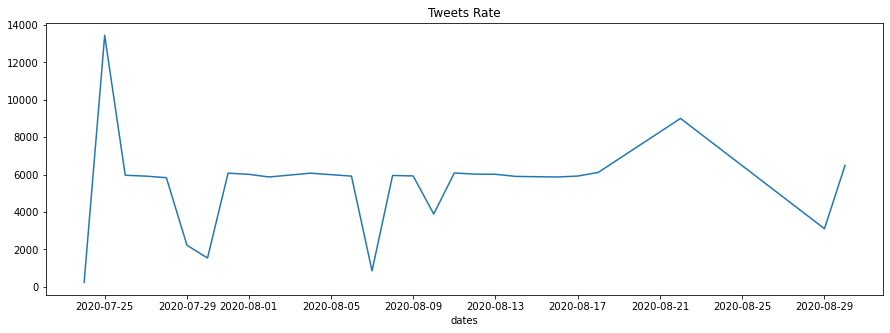

In [10]:
df = pd.DataFrame(tweets_df, columns = ['dates', 'text'])
df.set_index('dates', inplace=True)
df.groupby('dates').size().plot(figsize=(15, 5), title='Tweets Rate')

Above is the line chart to understand the tweets rate over the months.
The dataframe was grouped by dates and the Panda's in-built plot function was used to get the line chart

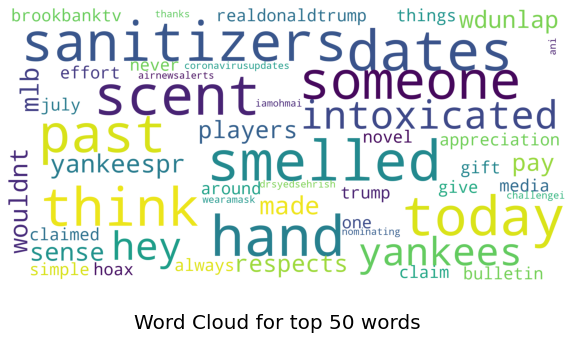

In [11]:
word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(df['text']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('Word Cloud for top 50 words', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

Above is the word cloud built using the library WordCloud to understand the most used words in the tweets in the given dataset.
Only the top 50 words are being visualized and the stop words will not be considered while creating this word cloud.  

The next visual that I am planning to do is for the hashtags. Most of the people use hashtags to follow some trending news or to post their opinions on that news.
A new subset with the field 'hashtags' is created which will later be grouped by the same column with counts of each group representing number of times that particular hashtag was used.

In [12]:
tweets_df = pd.DataFrame(tweets, columns = ['hashtags'])
tweets_df.dropna(subset=['hashtags'], inplace=True)
tweets_df = tweets_df.groupby(['hashtags']).size().reset_index(name='counts')
tweets_df

,hashtags,counts
0,"['1000USdeathsperday', 'realDonaldTrump', 'covid19', 'magicallydisappear', 'AP']",1
1,"['100Days', 'COVID19', 'LawAndOrder', 'economy']",1
2,"['100Days', 'COVID19', 'coronavirus']",1
3,"['100Days', 'COVID19']",1
4,"['100Days', 'Trump']",1
...,...,...
42860,['𝓒𝓞𝓥𝓘𝓓19'],1
42861,"['𝗖𝗼𝘃𝗶𝗱19', 'Mumbai']",2
42862,['𝗖𝗼𝘃𝗶𝗱19'],1
42863,['𝗪𝗔𝗦𝗛'],1


In [13]:
def get_dictionary_with_words_given_df(df_to_extract, column_name):
    '''
    Creating and returning a dictionary with key being the hashtags and value the count of number of times 
    the hashtag is encountered
    '''
    dictionary = dict()
    for key, value in df_to_extract.iterrows():
        
        if column_name == 'hashtags':
            value_list = ast.literal_eval(value[column_name])
        else:
            value_list = value[column_name]
        
        for hashtag in value_list:
            if hashtag in dictionary:
                dictionary[hashtag] += 1
            else:
                dictionary[hashtag] = 1
    return dictionary

<BarContainer object of 21 artists>

C:\Users\sande\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sande\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


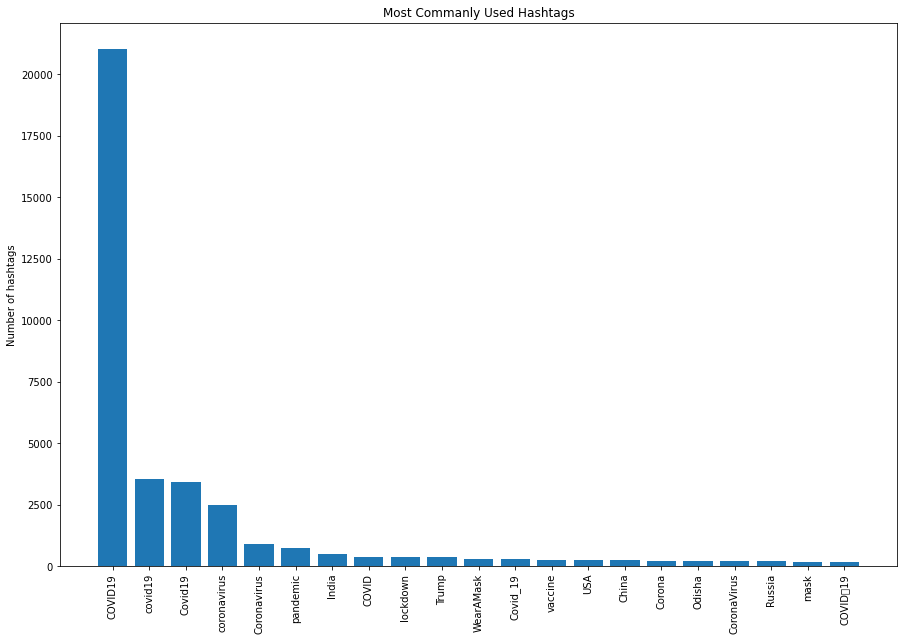

In [14]:
hashtags_dict = get_dictionary_with_words_given_df(tweets_df, 'hashtags')
common_hashtags = sorted(hashtags_dict.items(), key=lambda x: x[1], reverse=True)

hashtags_list = []
count_list = []
i = 0
for hashtag_tup in common_hashtags:
    hashtags_list.append(hashtag_tup[0])
    count_list.append(hashtag_tup[1])
    i += 1
    if i > 20:
        break
        
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
plt.ylabel("Number of hashtags")
plt.title("Most Commanly Used Hashtags")
plt.bar(hashtags_list, count_list)

Loading the tweets dataset again because the previously loaded tweets were cleaned to remove the special characters, emojis etc. in the tweets text. But now the special characters specifically '@', will be used to identify the people/users tagged in the tweets.

In [15]:
tweets = pd.read_csv(tweetpath)

In [16]:
def find_tagged_people(string):
    '''
    Finding the user accounts that is tagged in a tweet's text
    Regular expression is used to identify the word starting with the special character '@'
    '''
    tagged_results = re.findall(r'@[A-Z]\w+', string)
    return tagged_results

tweets['tagged']=tweets['text'].apply(lambda x : find_tagged_people(x))
tweets['tagged']

0                                                                                  []
1                                                        [@Yankees, @YankeesPR, @MLB]
2                                                                                  []
3                                                                                  []
4                                                              [@DrSyedSehrish, @ANI]
                                             ...                                     
179103                                                              [@IamOhmai, @WHO]
179104                                                                             []
179105                                                                     [@CTVNews]
179106                                                                             []
179107    [@SABCNews, @IzindabaNews24, @AliwalNorth, @Ambitiouz_Ent, @Official_SABC1]
Name: tagged, Length: 179108, dtype: object

Another insight that I am interested in exploring is seeing the most tagged users or user accounts. This could provide some information about around whom a conversation was mainly taking place which will also allow us to understand what topic could they be possibly discussing

In [17]:
tagged_dict = get_dictionary_with_words_given_df(tweets, "tagged")

<BarContainer object of 21 artists>

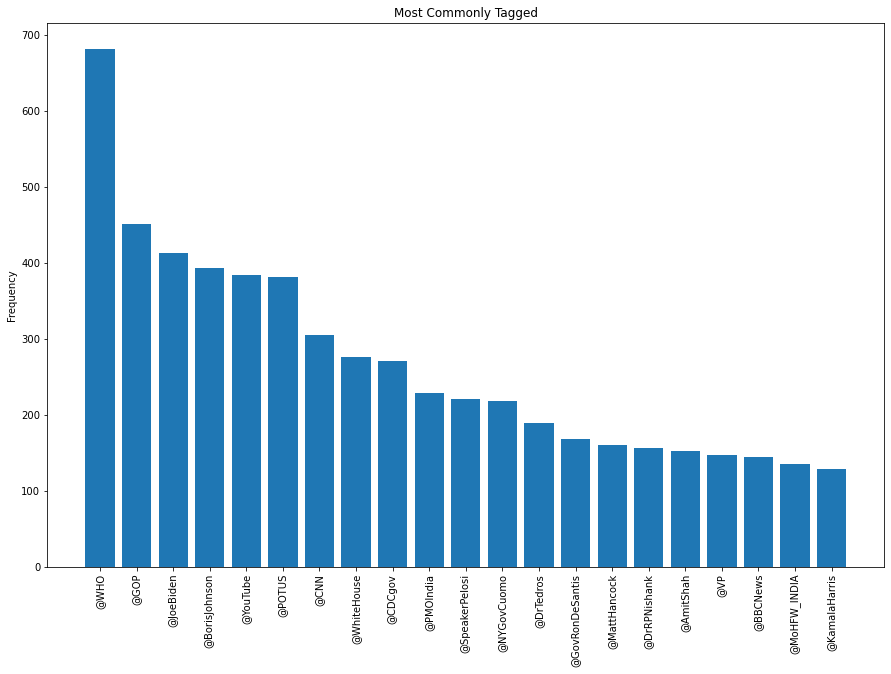

In [18]:
most_common_tagged = sorted(tagged_dict.items(), key=lambda x: x[1], reverse=True)

tagged_list = []
count_list = []
i = 0
for tup in most_common_tagged:
    tagged_list.append(tup[0])
    count_list.append(tup[1])
    i += 1
    if i > 20:
        break
        
plt.figure(figsize=(15, 10))
plt.ylabel("Frequency")
plt.title("Most Commonly Tagged")
plt.xticks(rotation=90)
plt.bar(tagged_list, count_list)

### Building the predictive model
The new prelabeled dataset is loaded onto a dataframe which will be used to build the predictive model.

In [19]:
sentiment_df = pd.read_csv('Sentiment_Data.csv')
sentiment_df

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly their poors seek a living in singapore and are treated like citizens they are given free medical treatment given food daily sim cards to call home to tell their family that they are fine if covid 19 case treated foc in hospitals
1,1431,joy,if only i could have spent the with this cutie vc sakshi__s i n g h coast crossing republik …
2,654,joy,will nature conservation remain a priority in post corona bangladesh | the daily star
3,2530,sad,"coronavirus disappearing in italy show this to ""intellectuals"" who say lockdowns do not work …"
4,2296,sad,uk records lowest daily virus death toll since start of lockdown govt
...,...,...,...
3085,2579,sad,today at 02 30pm a 54 year old bangladeshi male admitted at tree top hospital has passed away this is the 6th covid 19 death in the maldives our thoughts and prayers are with the bereaved family may allah grant his soul eternal peace in heaven
3086,3579,anger,corona virus i implore that you cease activity by april 1st this is not a suggestion this is a demand
3087,221,joy,issa date once lockdown ends inshaallah (and corona too) red_heart
3088,2705,sad,the death toll due to covid 19 rose to 31 in jammu and kashmir as third death was reported due to the coronavirus in j&k on monday dr mir mushtaq deputy medical superintendent district hospital pulwama told gns that 70 year old man was brought dead to the hospital this morning


Changing the existing sentiment categories to the one that closely represents my analysis and hypothesis.

Converting anger and fear to negative category.
Joy as positive and sad as neutral

In [20]:
sentiment_df.loc[sentiment_df['sentiment'] == 'anger', 'sentiment'] = 'negative'
sentiment_df.loc[sentiment_df['sentiment'] == 'fear', 'sentiment'] = 'negative'
sentiment_df.loc[sentiment_df['sentiment'] == 'joy', 'sentiment'] = 'positive'
sentiment_df.loc[sentiment_df['sentiment'] == 'sad', 'sentiment'] = 'neutral'
sentiment_df

,Unnamed: 0,sentiment,text
0,3204,neutral,agree the poor in india are treated badly their poors seek a living in singapore and are treated like citizens they are given free medical treatment given food daily sim cards to call home to tell their family that they are fine if covid 19 case treated foc in hospitals
1,1431,positive,if only i could have spent the with this cutie vc sakshi__s i n g h coast crossing republik …
2,654,positive,will nature conservation remain a priority in post corona bangladesh | the daily star
3,2530,neutral,"coronavirus disappearing in italy show this to ""intellectuals"" who say lockdowns do not work …"
4,2296,neutral,uk records lowest daily virus death toll since start of lockdown govt
...,...,...,...
3085,2579,neutral,today at 02 30pm a 54 year old bangladeshi male admitted at tree top hospital has passed away this is the 6th covid 19 death in the maldives our thoughts and prayers are with the bereaved family may allah grant his soul eternal peace in heaven
3086,3579,negative,corona virus i implore that you cease activity by april 1st this is not a suggestion this is a demand
3087,221,positive,issa date once lockdown ends inshaallah (and corona too) red_heart
3088,2705,neutral,the death toll due to covid 19 rose to 31 in jammu and kashmir as third death was reported due to the coronavirus in j&k on monday dr mir mushtaq deputy medical superintendent district hospital pulwama told gns that 70 year old man was brought dead to the hospital this morning


C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

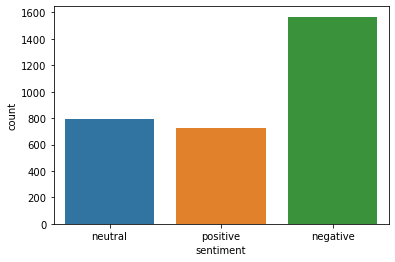

In [21]:
sns.countplot(sentiment_df['sentiment'])

The above bar chart shows the distribution of different categories of tweet sentiments being used. 

A vector is created for the words using the CountVectorizer library. This will be used to identify the moost frequently used words in different categories of sentiments of the tweets.

In [22]:
vectorizer = CountVectorizer(max_features = 4000)

In [23]:
sparse_wordcounts = vectorizer.fit_transform(sentiment_df.text)
wordcounts = sparse_wordcounts.toarray()
tweetwords = pd.DataFrame(wordcounts, columns = vectorizer.get_feature_names())
tweetwords.head()

,00,000,01,02,03,04,10,100,11,12,...,zee,zero,zones,ıd19,كورونا,क_कल,ण_स,ด19,โคว,ー19
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let us look at some of the words that are most likely to predict positive or negative sentiment.

In [24]:
negative_words = tweetwords.loc[sentiment_df['sentiment'] == 'negative', :].sum(axis = 'rows')
positive_words = tweetwords.loc[sentiment_df['sentiment'] == 'positive', :].sum(axis = 'rows')

In [25]:
def get_dunnings(word, series1, series2):
    observed = pd.DataFrame({'series1': [series1[word], sum(series1) - series1[word]],
                          'series2': [series2[word], sum(series2) - series2[word]]},
                        index = ['word', 'all_others'])
    total_words = observed.to_numpy().sum()
    observed['word_totals'] = observed.sum(axis = 1)
    observed = observed.append(observed.sum(axis = 0).rename(index = 'group_totals'))
    observed.iat[2,2] = 0
    observed['word_totals'] = observed['word_totals'] / sum(observed['word_totals'])
    observed.loc['group_totals', : ] = observed.loc['group_totals', : ] / sum(observed.loc['group_totals', : ])
    expected = np.outer(observed['word_totals'][0:2], observed.loc['group_totals', : ][0:2])
    expected = pd.DataFrame(expected, index = ['word', 'all_others'], columns = ['series1', 'series2'])
    expected = expected * total_words
    
    G = 0
    for i in range(2):
        for j in range(2):
            O = observed.iat[i, j] + .000001
            E = expected.iat[i, j] + .000001
            G = G + O * math.log(O / E)
    
    if (observed.iat[0, 0] / sum(observed.iloc[0: 2, 0])) < (observed.iat[0, 1] / sum(observed.iloc[0 : 2, 1])):
        G = -G    
    
    return 2 * G

The dunnings test will be used to identify the most likely words to represent the positive and negative sentiments.

In [26]:
dunningslist = []

for w in vectorizer.get_feature_names():
    G = get_dunnings(w, positive_words, negative_words)
    dunningslist.append(G)

dunnings = pd.Series(dunningslist, index = vectorizer.get_feature_names())
dunnings = dunnings.sort_values()

In [27]:
dunnings[0:20]

coronavirus   -353.006773
not            -85.307107
trump          -61.459385
virus          -54.229693
it             -52.191496
about          -50.531740
just           -46.741704
flu            -42.933247
the            -42.846009
do             -38.139668
shit           -36.998354
they           -36.654882
panic          -33.215646
that           -33.096886
or             -30.540926
fuck           -29.054851
fear           -25.711741
think          -25.576396
concerns       -25.090936
fucking        -24.430342
dtype: float64

The above words most likely represents the negative sentiments. The results seems to be accurate with words like virus, panic, flu, fear, concerns present. There were also some swear words used most often. 

In [28]:
dunnings[-20:]

beautiful        36.102249
happy            37.220998
thanks           37.799454
covid19          37.799454
proud            38.531255
day              38.750742
our              45.509250
life             49.328018
red_heart        50.788057
ji               53.212661
twitter          56.522902
com              57.812758
thank            58.068582
india            64.470060
good             68.120355
folded_hands     71.115415
sir              75.825893
19               85.570328
covid           116.088636
lockdown        264.508701
dtype: float64

Similar to the negative sentiment words, the above words are most likely used for positive sentiments.

Let's select a list of 400 highly predictive features.

In [29]:
extremefeatures = list(dunnings.index[0:100].values) + list(dunnings.index[-100: ].values)

In [30]:
extremefeatures[0:5]

['coronavirus', 'not', 'trump', 'virus', 'it']

### Logistic regression



Because this matrix is based on raw word counts, it conflates word frequency with tweet length. Tweet-length might be an interesting predictive feature, but we probably don't want it mixed into all the different words. Let's factor it out.


In [31]:
tweetlengths = sentiment_df['text'].str.len()
tweetlengths[0:10]

0    270
1     93
2     85
3     94
4     69
5    111
6    263
7     63
8    249
9    248
Name: text, dtype: int64

In [32]:
wordfreqs = tweetwords.divide(tweetlengths, axis = 'rows')
wordfreqs['#tweetlen'] = tweetlengths
wordfreqs

,00,000,01,02,03,04,10,100,11,12,...,zero,zones,ıd19,كورونا,क_कल,ण_स,ด19,โคว,ー19,#tweetlen
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3085,0.0,0.0,0.0,0.004115,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243
3086,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101
3087,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66
3088,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,277


We're going to want to hold out a "test" set to finally confirm the quality of our model. This should be randomly selected from all tweets, and we don't know the current sequence is random. So let's shuffle.

In [33]:
wordfreqs = wordfreqs.sample(frac = 1)
wordfreqs.head()

,00,000,01,02,03,04,10,100,11,12,...,zero,zones,ıd19,كورونا,क_कल,ण_स,ด19,โคว,ー19,#tweetlen
2985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201
1057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256
1025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146
567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160
1036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266


Notice that the indexes were shuffled too. This allows us to create a reordered ```tweets``` frame in the same order. We're going to need this if we want to know the true sentiment for all those rows.

In [34]:
reorderedtweets = sentiment_df.loc[wordfreqs.index, : ]
reorderedtweets.head()

,Unnamed: 0,sentiment,text
2985,1842,positive,thank you so much on time sanitization and complete cooperation by lavekar mam n her team virus chariot coop hsg society ltd 19 complex thank you pic twitter com/riofs8uoz0 – at golden chariot building
1057,170,neutral,inspite of having beds available bses hospital did'nt admit a 33 year old patient who was _negative & had breathing problems the patient died due to the negligence of the _management should b filled against the management & concerned doctor who denied them
1025,3572,negative,my allergies are fucking me up so bad right now and marquis is the asking around yelling i have the coronavirus somebody come get they mans please
567,2411,neutral,oh you have no idea how much i've looked forward to these each day they have been a highlight of thess quarantine / lockdown days in sad to see it end thank you
1036,4403,negative,coronavirus has been around too but not this particular strain similar thing happens with flu too (e g the buzz for swine flu) they evolve the flu vaccine is different every year to combat the different iterations and likely strains that are dangerous any given year


For our simplifying purposes let's get rid of 'neutral's.

In [35]:
wordfreqs = wordfreqs.loc[reorderedtweets['sentiment'] != 'neutral', : ]
reorderedtweets = reorderedtweets.loc[reorderedtweets['sentiment'] != 'neutral', : ]
wordfreqs.shape

(2295, 4001)

Now let's separate the tweets into test and train sets. There is no pre-defined rule as such on proportions for train and test sets as it mainly depends on the amount of data that is available. A 90-10 split would be good in case of large datasets but with only 2295 rows I will be setting aside 1000 for the test set and the remaining 1295 for the train test.

In [36]:
testfreqs = wordfreqs.iloc[0: 1000, : ]
test_y = (reorderedtweets['sentiment'][0: 1000] == 'positive').astype(int)
test_y[0:10]

2985    1
1025    0
1036    0
1239    0
2299    1
1327    0
1877    1
2478    0
2230    1
1581    0
Name: sentiment, dtype: int32

In [37]:
trainfreqs = wordfreqs.iloc[1000 : , : ]
train_y = (reorderedtweets['sentiment'][1000: ] == 'positive').astype(int) 
train_y[0:10]

1236    0
1252    0
19      0
1150    0
2116    1
1389    0
1786    1
400     0
2487    0
2807    0
Name: sentiment, dtype: int32

We want regularization to spread evenly across different variables, even though some variables (like ```#tweetlen```) are numerically much bigger than others. So we typically "scale" our X matrices before using logistic regression.

In [38]:
trainscaler = StandardScaler()
trainXscaled = trainscaler.fit_transform(trainfreqs)
trainXscaled = pd.DataFrame(trainXscaled, columns = trainfreqs.columns)
trainXscaled.head()

,00,000,01,02,03,04,10,100,11,12,...,zero,zones,ıd19,كورونا,क_कल,ण_स,ด19,โคว,ー19,#tweetlen
0,-0.047715,-0.070984,0.0,0.0,0.0,-0.036717,-0.086592,-0.081437,-0.066899,-0.039306,...,-0.070366,0.0,-0.039093,0.0,-0.055562,-0.055562,-0.027799,-0.027799,-0.101829,-1.483205
1,-0.047715,-0.070984,0.0,0.0,0.0,-0.036717,-0.086592,-0.081437,-0.066899,-0.039306,...,-0.070366,0.0,-0.039093,0.0,-0.055562,-0.055562,-0.027799,-0.027799,-0.101829,1.526282
2,-0.047715,-0.070984,0.0,0.0,0.0,-0.036717,-0.086592,-0.081437,-0.066899,-0.039306,...,-0.070366,0.0,-0.039093,0.0,-0.055562,-0.055562,-0.027799,-0.027799,-0.101829,-0.470923
3,-0.047715,-0.070984,0.0,0.0,0.0,-0.036717,-0.086592,-0.081437,-0.066899,-0.039306,...,-0.070366,0.0,-0.039093,0.0,-0.055562,-0.055562,-0.027799,-0.027799,-0.101829,1.102218
4,-0.047715,-0.070984,0.0,0.0,0.0,-0.036717,-0.086592,-0.081437,-0.066899,-0.039306,...,-0.070366,0.0,-0.039093,0.0,-0.055562,-0.055562,-0.027799,-0.027799,-0.101829,1.936667


In [39]:
testscaler = StandardScaler()
testXscaled = testscaler.fit_transform(testfreqs)
testXscaled = pd.DataFrame(testXscaled, columns = testfreqs.columns)

We are using two separate matrices because using one could leak information from the test set to train set which would over fit the test set results. 

#### Cross-validating a model

Using logistic regression algorithm to train the model and check its accuracy

In [40]:
logist = LogisticRegression(C = .1, max_iter = 1000) 
logist.fit(trainXscaled, train_y)

predictions = logist.predict(testXscaled)
sum(predictions == test_y) / len(predictions)

0.864

This is not always a safe way to measure accuracy. To understand why that could be the case let us see how many positive tweets do we actually have in our test set?

In [41]:
sum(test_y) / len(test_y)

0.305

Only 30% of the tweets are positive. 
So we can get an accuracy of 70% by predicting negative in every case.

A better measurement is F1 score:

    F1 = 2 * (precision * recall) / (precision + recall)

The following shows the code to calculate this

In [42]:
f1_score(test_y, predictions)

0.7580071174377225

To better understand the above number let us calculate the precision and recall. 

Precision: the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives

Recall: the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives

In [43]:
tp = sum((test_y == 1) & (predictions == 1))
fp = sum((test_y == 0) & (predictions == 1))
fn = sum((test_y == 1) & (predictions == 0))

precision = tp / (tp + fp)
recall = tp / (tp + fn)

F1 = 2 * (precision * recall) / (precision + recall)

print("Precision: ", round(precision, 4), "\nRecall: ", round(recall, 4), "\nF1: ", round(F1, 4))


Precision:  0.8288 
Recall:  0.6984 
F1:  0.758


It can be seen that precision is higher than recall meaning that its failing to recognize some positive tweets.

#### Handling imbalanced classes

To keep the model from always choosing negative, let us weight the classes inversely to their frequency. This will make errors in rare classes more costly.

In [44]:
logist = LogisticRegression(C = .1, max_iter = 1000, class_weight = 'balanced') 
logist.fit(trainXscaled, train_y)

predictions = logist.predict(testXscaled)

tp = sum((test_y == 1) & (predictions == 1))
fp = sum((test_y == 0) & (predictions == 1))
fn = sum((test_y == 1) & (predictions == 0))

precision = tp / (tp + fp)
recall = tp / (tp + fn)

F1 = 2 * (precision * recall) / (precision + recall)

print("Precision: ", round(precision, 4), "\nRecall: ", round(recall, 4), "\nF1: ", round(F1, 4))

Precision:  0.7875 
Recall:  0.741 
F1:  0.7635


This strategy does not necessarily improve the overall F1 score in every case, but it can prove to be significant in changing the balance between prevision and recall. The C parameter sets smoothing. Can play around with the C parameter to get the best accuracy. 
Testing it with the training set rather than on the test set because playing around with the test set could lead to some overfitting as there is a chance of data being leaked from test set onto to the training set. But is also important not to overfit the training set, so the cross-validating approach will be used to get the best C parameter (i.e, for a particular C parameter getting the best F1 score).

Constructing a for-loop that tests C parameters ranging from .00001 to 10, varying by powers of 10.

    [.00001, .0001, .001, .01, .1, 1, 10]

In each case, cross-validate on trainXscaled and report the f1 score. When you've got the C parameter that works best, use that model to make a prediction on testXscaled, and calculate both f1 score and accuracy for that prediction.

In [45]:
for c_param in [.00001, .0001, .001, .01, .1, 1, 10]:
    logist = LogisticRegression(C = c_param, max_iter = 1000, class_weight = 'balanced') 
    results = cross_validate(logist, trainXscaled, train_y, cv = 5, scoring = 'f1')
    print('C parameter:', c_param)
    print('Mean f1:', np.mean(results['test_score']))
    print()

C parameter: 1e-05
Mean f1: 0.7632216707153063

C parameter: 0.0001
Mean f1: 0.7684729873301301

C parameter: 0.001
Mean f1: 0.7943547963023565

C parameter: 0.01
Mean f1: 0.805762170982319

C parameter: 0.1
Mean f1: 0.8097680764264152

C parameter: 1
Mean f1: 0.8073038211464427

C parameter: 10
Mean f1: 0.7954058645502545



So the best C parameter is 0.1. Now we train a model using that parameter on the whole training set, and see how it performs on the test set.

In [46]:
logist = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = 'balanced') 
logist.fit(trainXscaled, train_y)
predictions = logist.predict(testXscaled)

tp = sum((test_y == 1) & (predictions == 1))
fp = sum((test_y == 0) & (predictions == 1))
fn = sum((test_y == 1) & (predictions == 0))

precision = tp / (tp + fp)
recall = tp / (tp + fn)

F1 = 2 * (precision * recall) / (precision + recall)

print("Precision: ", round(precision, 4), "\nRecall: ", round(recall, 4), "\nF1: ", round(F1, 4))

Precision:  0.7875 
Recall:  0.741 
F1:  0.7635


So F1 measure of 0.76 is a pretty reliable picture of how well we can separate negative and positive tweets in the future.

In [47]:
positive_tweets = (predictions == 1).sum()
negative_tweets = (predictions == 0).sum()
print("Proportion of positive tweets predicted: ", round(positive_tweets/(positive_tweets+negative_tweets)*100, 2), "%")

print("Proportion of negative tweets predicted: ", round(negative_tweets/(positive_tweets+negative_tweets)*100, 2), "%")

Proportion of positive tweets predicted:  28.7 %
Proportion of negative tweets predicted:  71.3 %


Identifying the co-efficients of the highly predictive features


In [48]:
logist = LogisticRegression(C = c_param, max_iter = 1000, class_weight = 'balanced')
logist.fit(trainXscaled, train_y)
coefficients = [x for x in zip(logist.coef_[0], vectorizer.get_feature_names())]

In [49]:
coefficients.sort()

In [50]:
coefficients[0:20]

[(-1.0026658583971049, 'coronavirus'),
 (-0.6521063612866661, 'fuck'),
 (-0.48933145602500977, 'panic'),
 (-0.4625435193690643, 'the'),
 (-0.45933263905582356, 'virus'),
 (-0.4058833264784081, 'not'),
 (-0.36385601797593825, 'stupid'),
 (-0.3282627888338575, 'wait'),
 (-0.29676069250412945, 'just'),
 (-0.28542071516001055, 'al'),
 (-0.28148782904329517, 'sick'),
 (-0.2666341454599845, 'affected'),
 (-0.26165337934269306, 'get'),
 (-0.2583051191006631, 'blood'),
 (-0.24434159454364465, 'fucking'),
 (-0.24265454715106144, 'christian'),
 (-0.2403543364964751, 'shit'),
 (-0.23924265442162676, 'now'),
 (-0.22982811534283842, 'about'),
 (-0.22970619287505037, 'trump')]

In [51]:
coefficients[-20:]

[(0.24767906634317893, 'present'),
 (0.24952946940841553, 'smiling_face_with_smiling_eyes'),
 (0.2499771658620851, 'moment'),
 (0.2517528572100325, 'best'),
 (0.2536753464313555, '19'),
 (0.25465178380183784, 'done'),
 (0.25939564108617613, 'days'),
 (0.2602389618394828, 'set'),
 (0.2703860200295384, 'bring'),
 (0.2742098787580084, 'loved'),
 (0.27779578290697615, 'news'),
 (0.29015216291857576, 'great'),
 (0.2956692921315236, 'covid'),
 (0.3011584598454897, 'sir'),
 (0.32645240105908147, 'beauty'),
 (0.34324522982746014, 'life'),
 (0.3824388983205403, 'win'),
 (0.4126324519689297, 'good'),
 (0.44322464537014516, 'lockdown'),
 (0.60416910816267, 'pic')]